In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
# setting plt defaults
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

#### Importing data

In [9]:
df = pd.read_csv('../telecom_churn.csv')

In [10]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Suppose that we want to analyze the correlation between customer service calls feature and churn rate from the dataset, so we visualize it

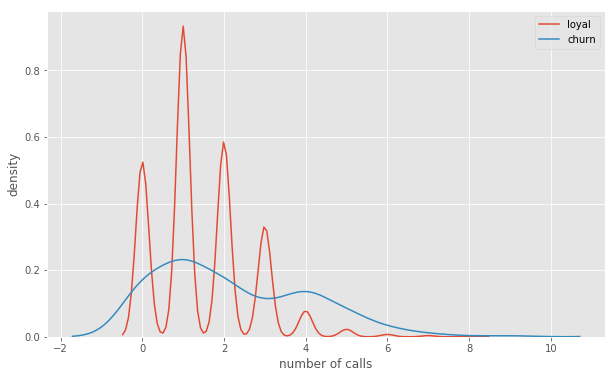

In [27]:
fig = sns.kdeplot(df[df['churn'] == False]['customer service calls'], label='loyal')
fig = sns.kdeplot(df[df['churn'] == True]['customer service calls'], label='churn')
fig.set(xlabel='number of calls', ylabel='density')
plt.show()

### Bootstrapping

the idea behind bootstrapping is quite simple, we make a new data containing n-values based on the value distribution of the original data. This is especially useful when we have a feature that have stong correlation with the target data but doesn't have enough distribution of that paricular feature.

Let's try and apply this to the sample above:

In [26]:
import numpy as np

# generate bootstrap samples
def get_bootstrap_samples(data, n_samples):
    
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

# poduce an interval estimate
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# create loyal and churn object in relation with customer service calls
loyal = df[df['churn'] == False]['customer service calls'].values
churn = df[df['churn'] == True]['customer service calls'].values

# set the seed for reproducibilit of the results
np.random.seed(0)

# generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean = [np.mean(sample) for sample in get_bootstrap_samples(loyal, 10000)]
churn_mean = [np.mean(sample) for sample in get_bootstrap_samples(churn, 10000)]

print('customer service calls from loyal customers: mean interval', stat_intervals(loyal_mean, 0.05))
print('customer service calls from churn customers: mean interval', stat_intervals(churn_mean, 0.05))

customer service calls from loyal customers: mean interval [1.4080614  1.49368421]
customer service calls from churn customers: mean interval [2.06625259 2.39958592]


### Bagging

In a nutshell, we generate multiple bootstraps from he original data and aggegate the value